# Notebook Structure

1. Import necessary dependencies
2. Create the dataset
3. Create lollipop chart


# 1. Import necessary dependencies

In [74]:
# libraries & dataset

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

# 2. Create the dataset

In [75]:
# Sample Data (Replace with your actual data)

data = {
    'City': ['Salem', 'Tacoma', 'Los Angeles', 'Seattle', 'Portland', 'San Diego', 'Hidalgo', 'Spokane',
             'Bremerton', 'Beverly Hills', 'Merida', 'Vancouver', 'San Andres', 'Orizaba', 'Camacho',
             'Acapulco', 'Yakima', 'Mexico City', 'Victoria', 'Walla Walla', 'Bellingham',
             'San Francisco', 'Guadalajara'],
    'Female Revenue': [8500, 7200, 5500, 6800, 7500, 6200, 4000, 5800, 6500, 7000, 5200, 6000,
                       4500, 5000, 4800, 7800, 5500, 8000, 7300, 4200, 6000, 8200, 4000],
    'Male Revenue': [7000, 7000, 5800, 6500, 7000, 6000, 7440, 5500, 6200, 6800, 4333, 4380,
                     3285, 3000, 2840, 7500, 4000, 7800, 5300, 3040, 4350, 6560, 3200]
}

In [76]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data)
df

,City,Female Revenue,Male Revenue
0,Salem,8500,7000
1,Tacoma,7200,7000
2,Los Angeles,5500,5800
3,Seattle,6800,6500
4,Portland,7500,7000
5,San Diego,6200,6000
6,Hidalgo,4000,7440
7,Spokane,5800,5500
8,Bremerton,6500,6200
9,Beverly Hills,7000,6800


In [77]:
# Calculate the difference in revenue
df['Difference'] = df['Female Revenue'] - df['Male Revenue']
df['Abs Difference'] = abs(df['Difference'])
df = df.sort_values(by='Abs Difference', ascending=False)
df

,City,Female Revenue,Male Revenue,Difference,Abs Difference
6,Hidalgo,4000,7440,-3440,3440
18,Victoria,7300,5300,2000,2000
13,Orizaba,5000,3000,2000,2000
14,Camacho,4800,2840,1960,1960
20,Bellingham,6000,4350,1650,1650
21,San Francisco,8200,6560,1640,1640
11,Vancouver,6000,4380,1620,1620
16,Yakima,5500,4000,1500,1500
0,Salem,8500,7000,1500,1500
12,San Andres,4500,3285,1215,1215


# 3. Create the lollipop chart

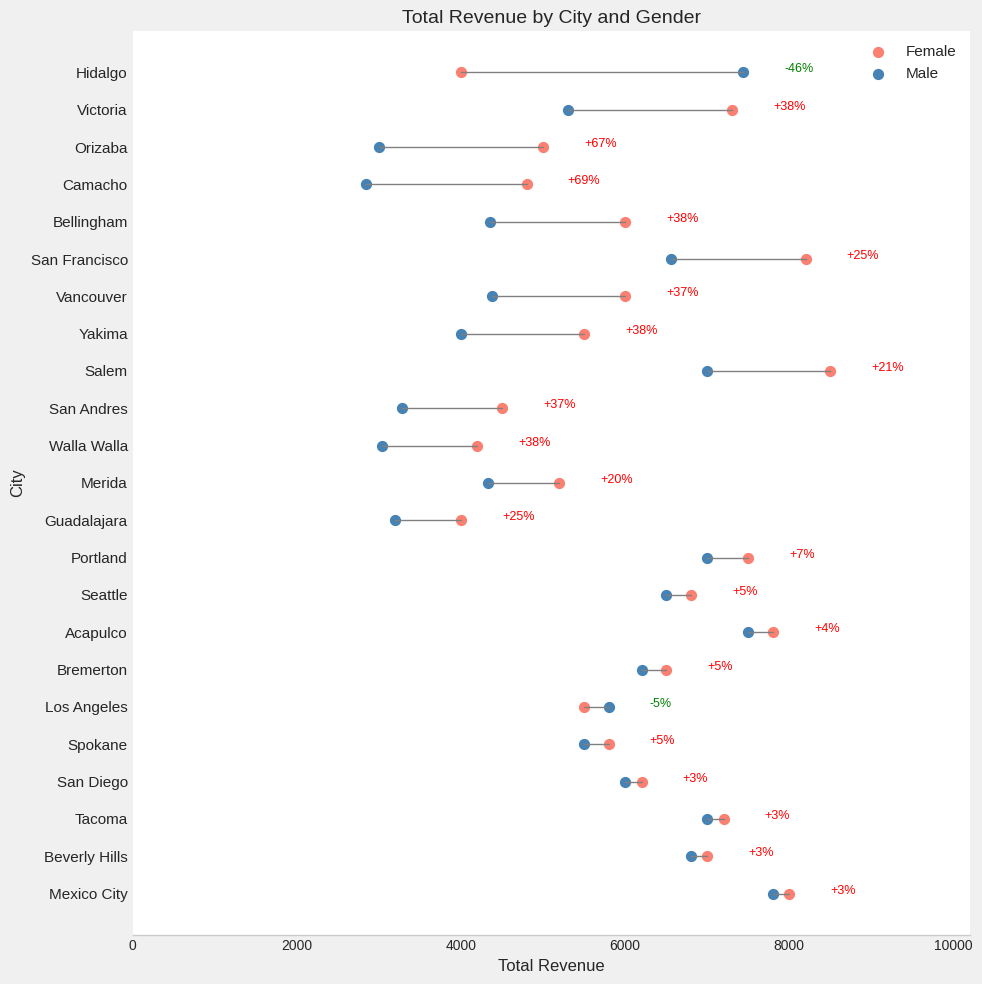

In [92]:
# --- Matplotlib Code ---

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#f0f0f0')

# Plotting Female Revenue (left dots)
ax.scatter(df['Female Revenue'], df['City'], color='salmon', label='Female', s=50)

# Plotting Male Revenue (right dots)
ax.scatter(df['Male Revenue'], df['City'], color='steelblue', label='Male', s=50)

# Plotting the connecting lines
for index, row in df.iterrows():
    ax.plot([row['Female Revenue'], row['Male Revenue']], [row['City'], row['City']], color='gray', linestyle='-', linewidth=1)

# Annotate all differences
for index, row in df.iterrows():
    diff = row['Difference']
    x_pos = max(row['Female Revenue'], row['Male Revenue']) + 500
    color = 'red' if diff > 0 else 'green'
    sign = '+' if diff > 0 else '-'
    percentage_diff = (abs(diff) / row['Male Revenue']) * 100 if row['Male Revenue'] != 0 else float('inf')
    ax.annotate(f'{sign}{percentage_diff:.0f}%', (x_pos, row['City']), color=color, fontsize=9)

# Set labels and title
ax.set_xlabel('Total Revenue', fontsize=12)
ax.set_ylabel('City', fontsize=12)
ax.set_title('Total Revenue by City and Gender', fontsize=14)
ax.invert_yaxis()  # To have cities in the order they appear in the DataFrame

# Customize x-axis
ax.tick_params(axis='x', labelsize=10)
ax.set_xlim(0, df[['Female Revenue', 'Male Revenue']].max().max() * 1.2) # Adjust x-axis limits to accommodate all annotations

# Add legend
ax.legend(loc='upper right', frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(visible=None)

plt.tight_layout()
plt.show()